# DIPA Practical 4
- Name : Aayush Shah
> Roll Number : 19BCE245


# Histogram Equalization
- Histogram Equalization is a computer image processing technique used to improve contrast in images.
    - cdf and pdf plotting

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab.patches import cv2_imshow

In [ ]:
def display_image(image):
    cv2_imshow(image)

In [ ]:
def histogram_equlization(image):

    # converting image to grey scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

    # determining max and min pixel value
    max_pixel_value = np.max(image) 
    min_pixel_value = np.min(image)

    # counting frequencies of all pixels in image and making dictionary
    d = defaultdict(int)
    for sublist in gray_image:
        for word in sublist:
            d[word] += 1

    # sorting dictionary by key
    s = sorted(d.items())

    # adding missing intensity values
    counter = 0
    final_s = []
    for i in range(256):
        if s[counter][0]==i:
            final_s.append(s[counter])
            counter += 1
        else:
            final_s.append((i,0))
    
    # final intensity list (grabbing values only from final_s)
    intensity = [x[1] for x in final_s]

    # finding cumulative intensity
    cum_intensity = [sum(intensity[:i]) for i in range(1, len(intensity)+1)]

    # normalizing cumulative intensity
    norm_intensity = [(i/(image.shape[0]*image.shape[1])) for i in cum_intensity]
    
    # multiplying cumulative intensity with maximum image pixel value
    mul_intensity = [round(i*max_pixel_value) for i in norm_intensity]

    # mapping final intensity values to original intensities
    equalized_image = [map(lambda x: mul_intensity[x], i) for i in gray_image]

    # making image array out of this new intensities
    equalized_image = []
    for i in gray_image:
        row = []
        for j in i:
            row.append(mul_intensity[j])
        equalized_image.append(row)
    equ_image = Image.fromarray(np.uint8(equalized_image), 'L')

    # converting PIL image to numpy array
    pix = np.array(equ_image)
    return pix

In [ ]:
def histogram_equlization_rgb(image):

    # splitting bgr intensities
    b_intensity = []
    g_intensity = []
    r_intensity = []
    for i in image:
        b_row = []
        g_row = []
        r_row = []
        for j in i:
            b_row.append(j[0])
            g_row.append(j[1])
            r_row.append(j[2])
        b_intensity.append(b_row)
        g_intensity.append(g_row)
        r_intensity.append(r_row)
    
    intensity_list = [b_intensity, g_intensity, r_intensity]

    # determining equalization for each bgr intensity
    final_intensity_list = []
    for x_intensity in intensity_list:

        # determining max and min pixel value
        max_pixel_value = np.max(x_intensity) 
        min_pixel_value = np.min(x_intensity)

        # counting frequencies of all pixels in image and making dictionary
        d = defaultdict(int)
        for sublist in x_intensity:
            for word in sublist:
                d[word] += 1

        # sorting dictionary by key
        s = sorted(d.items())

        # adding missing intensity values
        counter = 0
        final_s = []
        for i in range(256):
            if s[counter][0]==i:
                final_s.append(s[counter])
                counter += 1
            else:
                final_s.append((i,0))
        
        # final intensity list (grabbing values only from final_s)
        intensity = [x[1] for x in final_s]

        # finding cumulative intensity
        cum_intensity = [sum(intensity[:i]) for i in range(1, len(intensity)+1)]

        # normalizing cumulative intensity
        norm_intensity = [(i/(image.shape[0]*image.shape[1])) for i in cum_intensity]
        
        # multiplying cumulative intensity with maximum image pixel value
        mul_intensity = [round(i*max_pixel_value) for i in norm_intensity]

        # mapping final intensity values to original intensities
        equalized_image = [map(lambda x: mul_intensity[x], i) for i in x_intensity]

        # making image array out of this new intensities
        equalized_image = []
        for i in x_intensity:
            row = []
            for j in i:
                row.append(mul_intensity[j])
            equalized_image.append(row)
        

        final_intensity_list.append(np.array(equalized_image))
        # display(Image.fromarray(np.uint8(final_intensity_list[-1]), 'L'))
        # equ_image = Image.fromarray(np.uint8(equalized_image), 'L')

        # # converting PIL image to numpy array
        # pix = np.array(equ_image)
        # return pix

    
    final_image_mat = np.zeros((image.shape[0], image.shape[1], 3))
    print(final_image_mat.shape)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            final_image_mat[row][col][0] = int(b_intensity[row][col])
            final_image_mat[row][col][1] = int(g_intensity[row][col])
            final_image_mat[row][col][2] = int(r_intensity[row][col])
    # print(final_image_mat[0][0])
    # print(type(final_image_mat[0][0][0]))
    output_image = Image.fromarray(final_image_mat, 'RGB')
    
    
    display(output_image)

In [ ]:
spider_image = cv2.imread('spiderman-forever.jpeg')
# cv2_imshow(spider_image)
print(spider_image.shape)
print(type(spider_image))
print(spider_image[0])
print(spider_image[0][0])

(910, 1600, 3)
<class 'numpy.ndarray'>
[[22 16 17]
 [19 13 14]
 [14  8  9]
 ...
 [69 65 71]
 [74 68 79]
 [53 49 60]]
[22 16 17]


(910, 1600, 3)


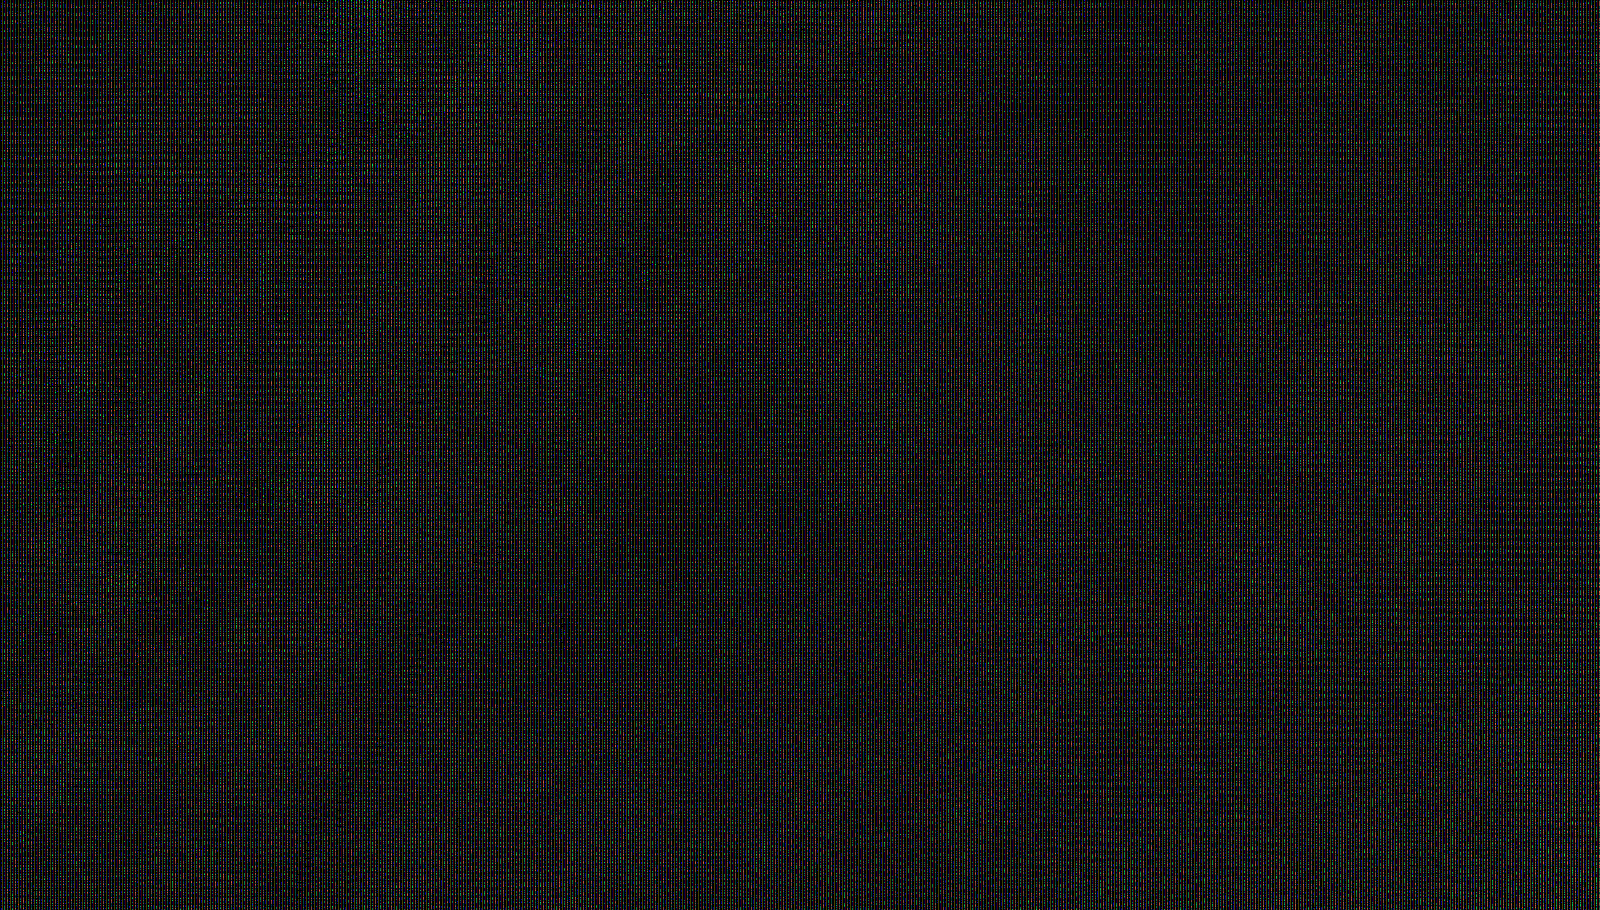

In [ ]:
histogram_equlization_rgb(spider_image)

In [ ]:
b_intensity = []
g_intensity = []
r_intensity = []
for i in spider_image:
    b_row = []
    g_row = []
    r_row = []
    for j in i:
        b_row.append(j[0])
        g_row.append(j[1])
        r_row.append(j[2])
    b_intensity.append(b_row)
    g_intensity.append(g_row)
    r_intensity.append(r_row)
print(b_intensity[0][:10])
print(g_intensity[0][:10])
print(r_intensity[0][:10])

[22, 19, 14, 11, 13, 16, 15, 11, 18, 16]
[16, 13, 8, 5, 7, 10, 9, 5, 12, 10]
[17, 14, 9, 6, 8, 11, 10, 6, 13, 11]


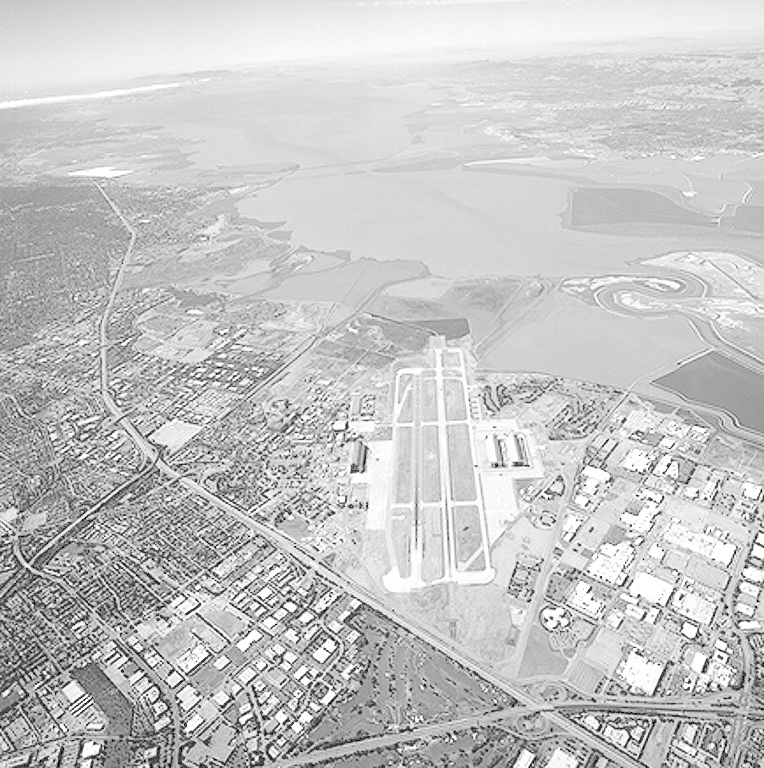

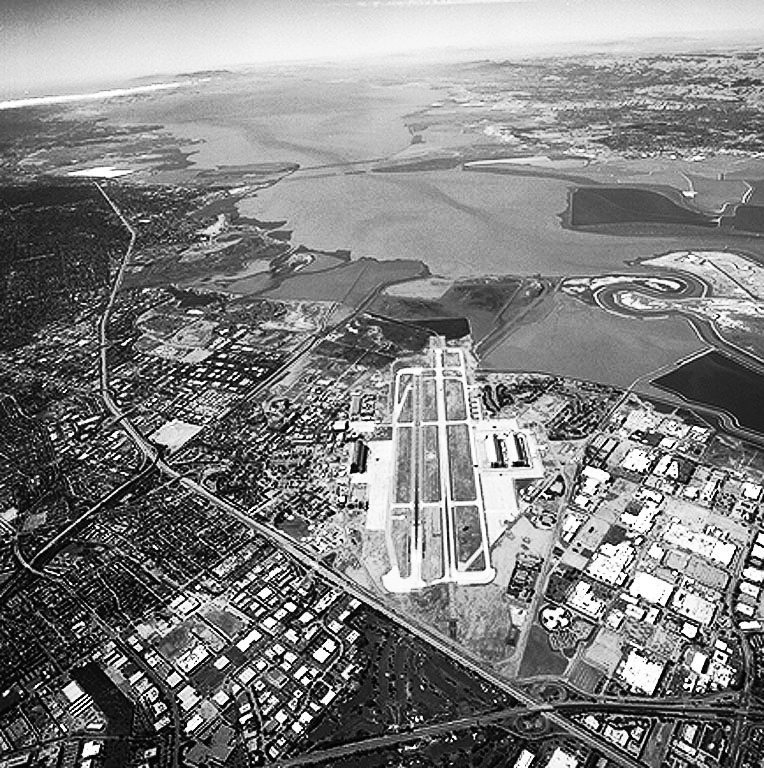

In [ ]:
image = cv2.imread('fig3.09(a).jpg')
output_image = histogram_equlization(image)
display_image(image)
display_image(output_image)